In [1]:
from linear_regression import LinearRegression, MLSTrainer, SGDTrainer
import numpy as np
import matplotlib.pyplot as plt

SIZE = 100
SAMPLES = 100

## 2 inputs -> 1 output mapping ##

### Generating the dataset ###

$f(x,y) = 0.6 * y + 0.4 * x^2 * 1.5 + y^2 * 1.2 + 0.2$

We sample with white noise error so we get the samples from $\hat{f}(x,y) = f(x,y) + error$

In [2]:
X = np.random.uniform(0,1,size=(SAMPLES,2))

Y = (np.matmul(X,[[0.6],[0.4]]) + 
     np.matmul(np.power(X, 2), [[1.5], [1.2]]) +
     0.2 + 
    np.random.normal(np.zeros((SAMPLES,1)), 0.1))

### Defining the model and fit it to the data ###

In [3]:
model = LinearRegression(2,1, trainer=MLSTrainer)
model.fit(X, Y)

### Getting the prediction from every point of the plane ###

In [4]:
X_coords = np.linspace(0, 1, SIZE)
Y_coords = np.linspace(0, 1, SIZE)
Z = np.transpose([np.tile(X_coords, len(Y_coords)), np.repeat(Y_coords, len(X_coords))])
Z = model.predict(Z)
im = np.zeros((SIZE, SIZE), dtype=np.float32)

for i, x in enumerate(Z):
    im[i//SIZE, i%SIZE] = x

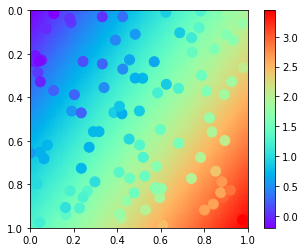

In [5]:
plt.scatter(X[...,0], X[...,1], c=Y[:,0], cmap='rainbow',s=100)
plt.imshow(im, cmap='rainbow', interpolation='none', extent=[0,1,1,0])
plt.colorbar()
plt.show()